In [1]:
# Import libraries and packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU
from tensorflow.keras.optimizers import SGD
import pandas as pd
import numpy as np
import random
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

%matplotlib inline
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("NN Project Data - Signal.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'NN Project Data - Signal.csv'

In [114]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [116]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [117]:
df["Signal_Strength"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [118]:
import pandas as pd
int_to_int_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df['Signal_Strength'] = df['Signal_Strength'].replace(int_to_int_mapping)

print(df)


      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
4             7.4        0.700         0.00          1.9        0.076   
...           ...          ...          ...          ...          ...   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0         34.0      0.99780      

In [119]:
df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


In [120]:
X = df.drop("Signal_Strength", axis=1) # all independent variables
y = df['Signal_Strength'] # dependent variables
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (1599, 11)
y shape: (1599,)


In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=10)
print("Train size",X_train.shape,y_train.shape)
print("Test size",X_test.shape,y_test.shape)


Train size (1119, 11) (1119,)
Test size (480, 11) (480,)


In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm_scaler = MinMaxScaler()
X_train_scale = mm_scaler.fit_transform(X_train)
X_test_scale = mm_scaler.transform(X_test)

In [123]:
X_train_scale.shape

(1119, 11)

In [124]:
set(y_train)

{0, 1, 2, 3, 4, 5}

In [125]:
trainY = to_categorical(y_train, num_classes=6)  
testY = to_categorical(y_test, num_classes=6) 

In [126]:
trainY[0]

array([0., 0., 0., 1., 0., 0.], dtype=float32)

In [127]:
# define the 3072-1024-512-1 architecture using Keras

model = Sequential()

# input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
# first hidden layer has 1024 nodes
model.add(Dense(units = 1024, input_shape=(11,), kernel_initializer = 'uniform', activation="relu"))

model.add(Dropout(0.4))

model.add(Dense(units=1024, kernel_initializer='uniform', activation="relu"))

model.add(Dropout(0.4))

model.add(Dense(units=1024, kernel_initializer='uniform', activation="relu"))

model.add(Dropout(0.4))

model.add(Dense(units=1024, kernel_initializer='uniform', activation="relu"))

model.add(Dropout(0.4))

model.add(Dense(units=1024, kernel_initializer='uniform', activation="relu"))


 # output layer with number of possible class labels
model.add(Dense(units=6,kernel_initializer='uniform', activation="softmax"))

In [128]:
# Compiling
model.compile(optimizer = 'adam', 
                         loss = 'categorical_crossentropy',
                         metrics=["accuracy"])


model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 1024)              12288     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_103 (Dense)           (None, 1024)              1049600   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_104 (Dense)           (None, 1024)              1049600   
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_105 (Dense)           (None, 1024)            

In [129]:
# Fitting the ANN to the Training set

EPOCHS = 200

history_1 = model.fit(X_train_scale,
                          trainY,
                          batch_size=128 , 
                          epochs=EPOCHS , 
                          validation_split=0.1,
                          verbose = 1)

# save trained model
model.save("Model_1.h5")

Epoch 1/200
8/8 [==============================] - 2s 95ms/step - loss: 1.4568 - accuracy: 0.4032 - val_loss: 1.2769 - val_accuracy: 0.4107
Epoch 2/200
8/8 [==============================] - 1s 72ms/step - loss: 1.2345 - accuracy: 0.4081 - val_loss: 1.0702 - val_accuracy: 0.5268
Epoch 3/200
8/8 [==============================] - 1s 73ms/step - loss: 1.1580 - accuracy: 0.4846 - val_loss: 1.0347 - val_accuracy: 0.5357
Epoch 4/200
8/8 [==============================] - 1s 75ms/step - loss: 1.1081 - accuracy: 0.5402 - val_loss: 1.0685 - val_accuracy: 0.5000
Epoch 5/200
8/8 [==============================] - 1s 74ms/step - loss: 1.0632 - accuracy: 0.5611 - val_loss: 1.0017 - val_accuracy: 0.5714
Epoch 6/200
8/8 [==============================] - 1s 75ms/step - loss: 1.0239 - accuracy: 0.5710 - val_loss: 0.9871 - val_accuracy: 0.5357
Epoch 7/200
8/8 [==============================] - 1s 75ms/step - loss: 1.0348 - accuracy: 0.5591 - val_loss: 1.0187 - val_accuracy: 0.5446
Epoch 8/200
8/8 [===

8/8 [==============================] - 1s 75ms/step - loss: 0.7803 - accuracy: 0.6574 - val_loss: 0.9492 - val_accuracy: 0.5804
Epoch 60/200
8/8 [==============================] - 1s 75ms/step - loss: 0.7851 - accuracy: 0.6544 - val_loss: 0.9590 - val_accuracy: 0.5714
Epoch 61/200
8/8 [==============================] - 1s 76ms/step - loss: 0.7616 - accuracy: 0.6792 - val_loss: 0.9819 - val_accuracy: 0.5893
Epoch 62/200
8/8 [==============================] - 1s 76ms/step - loss: 0.7496 - accuracy: 0.6614 - val_loss: 0.9550 - val_accuracy: 0.6161
Epoch 63/200
8/8 [==============================] - 1s 75ms/step - loss: 0.7599 - accuracy: 0.6653 - val_loss: 0.9871 - val_accuracy: 0.5893
Epoch 64/200
8/8 [==============================] - 1s 75ms/step - loss: 0.7661 - accuracy: 0.6802 - val_loss: 1.0057 - val_accuracy: 0.5536
Epoch 65/200
8/8 [==============================] - 1s 76ms/step - loss: 0.7672 - accuracy: 0.6723 - val_loss: 1.0099 - val_accuracy: 0.5714
Epoch 66/200
8/8 [========

8/8 [==============================] - 1s 74ms/step - loss: 0.6178 - accuracy: 0.7299 - val_loss: 1.2207 - val_accuracy: 0.6161
Epoch 118/200
8/8 [==============================] - 1s 75ms/step - loss: 0.6139 - accuracy: 0.7269 - val_loss: 1.2688 - val_accuracy: 0.5625
Epoch 119/200
8/8 [==============================] - 1s 74ms/step - loss: 0.6242 - accuracy: 0.7239 - val_loss: 1.2249 - val_accuracy: 0.5982
Epoch 120/200
8/8 [==============================] - 1s 75ms/step - loss: 0.5924 - accuracy: 0.7269 - val_loss: 1.2556 - val_accuracy: 0.5982
Epoch 121/200
8/8 [==============================] - 1s 76ms/step - loss: 0.6066 - accuracy: 0.7249 - val_loss: 1.2987 - val_accuracy: 0.5982
Epoch 122/200
8/8 [==============================] - 1s 76ms/step - loss: 0.5946 - accuracy: 0.7507 - val_loss: 1.2869 - val_accuracy: 0.5893
Epoch 123/200
8/8 [==============================] - 1s 75ms/step - loss: 0.6204 - accuracy: 0.7358 - val_loss: 1.3945 - val_accuracy: 0.6429
Epoch 124/200
8/8 [=

Epoch 175/200
8/8 [==============================] - 1s 76ms/step - loss: 0.5622 - accuracy: 0.7577 - val_loss: 1.5674 - val_accuracy: 0.6786
Epoch 176/200
8/8 [==============================] - 1s 77ms/step - loss: 0.5153 - accuracy: 0.7686 - val_loss: 1.5243 - val_accuracy: 0.6607
Epoch 177/200
8/8 [==============================] - 1s 77ms/step - loss: 0.5319 - accuracy: 0.7656 - val_loss: 1.5859 - val_accuracy: 0.6250
Epoch 178/200
8/8 [==============================] - 1s 78ms/step - loss: 0.5030 - accuracy: 0.7646 - val_loss: 1.5993 - val_accuracy: 0.6607
Epoch 179/200
8/8 [==============================] - 1s 78ms/step - loss: 0.5236 - accuracy: 0.7577 - val_loss: 1.6144 - val_accuracy: 0.6339
Epoch 180/200
8/8 [==============================] - 1s 77ms/step - loss: 0.4964 - accuracy: 0.7736 - val_loss: 1.6517 - val_accuracy: 0.5982
Epoch 181/200
8/8 [==============================] - 1s 76ms/step - loss: 0.4998 - accuracy: 0.7895 - val_loss: 1.5943 - val_accuracy: 0.6250
Epoch 

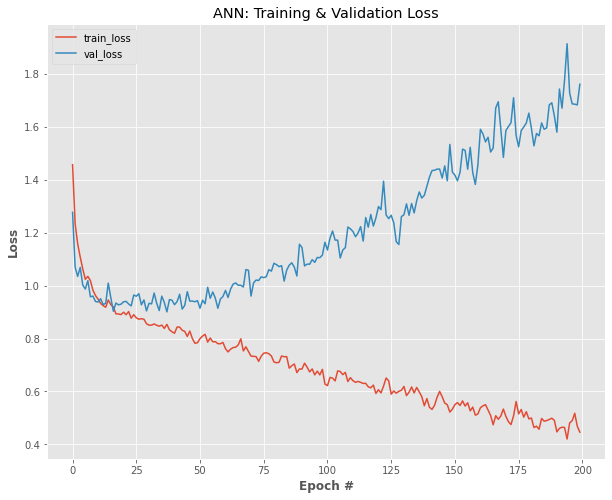

In [130]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, history_1.history["loss"], label="train_loss")
plt.plot(N, history_1.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [131]:

model1 = Sequential()

# Input layer: 3072 nodes
model1.add(Dense(units=128, input_dim=11, kernel_initializer='uniform'))  # Fix input_dim and units for the first layer
model1.add(LeakyReLU(alpha=0.1))  # Adding LeakyReLU activation

model1.add(Dense(units=64, kernel_initializer='uniform'))
model1.add(LeakyReLU(alpha=0.1))

# model1.add(Dense(units=64, kernel_initializer='uniform'))
# model1.add(LeakyReLU(alpha=0.1))

model1.add(Dense(units=32, kernel_initializer='uniform'))
model1.add(LeakyReLU(alpha=0.1))

model1.add(Dense(units=16, kernel_initializer='uniform')) 
model1.add(LeakyReLU(alpha=0.1))

# Output layer with number of possible class labels
model1.add(Dense(units=6, kernel_initializer='uniform', activation='softmax'))


In [132]:
# Compiling
model1.compile(optimizer = 'adam', 
                         loss = 'categorical_crossentropy',
                         metrics=["accuracy"])


model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 128)               1536      
                                                                 
 leaky_re_lu_73 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_109 (Dense)           (None, 64)                8256      
                                                                 
 leaky_re_lu_74 (LeakyReLU)  (None, 64)                0         
                                                                 
 dense_110 (Dense)           (None, 32)                2080      
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_111 (Dense)           (None, 16)              

In [133]:
# Fitting the ANN to the Training set

EPOCHS = 300
history_2 = model1.fit(X_train_scale,
                          trainY,
                          batch_size=128 , 
                          epochs=EPOCHS , 
                          validation_split=0.1,
                          verbose = 1)

# save trained model
model1.save("Model_2.h5")

Epoch 1/300
8/8 [==============================] - 1s 30ms/step - loss: 1.7876 - accuracy: 0.3803 - val_loss: 1.7814 - val_accuracy: 0.4375
Epoch 2/300
8/8 [==============================] - 0s 10ms/step - loss: 1.7768 - accuracy: 0.4191 - val_loss: 1.7670 - val_accuracy: 0.4375
Epoch 3/300
8/8 [==============================] - 0s 11ms/step - loss: 1.7583 - accuracy: 0.4191 - val_loss: 1.7364 - val_accuracy: 0.4375
Epoch 4/300
8/8 [==============================] - 0s 9ms/step - loss: 1.7101 - accuracy: 0.4191 - val_loss: 1.6463 - val_accuracy: 0.4375
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 1.5719 - accuracy: 0.4191 - val_loss: 1.4154 - val_accuracy: 0.4375
Epoch 6/300
8/8 [==============================] - 0s 9ms/step - loss: 1.3350 - accuracy: 0.4191 - val_loss: 1.1841 - val_accuracy: 0.4375
Epoch 7/300
8/8 [==============================] - 0s 8ms/step - loss: 1.2559 - accuracy: 0.4191 - val_loss: 1.1610 - val_accuracy: 0.4375
Epoch 8/300
8/8 [=======

8/8 [==============================] - 0s 8ms/step - loss: 1.1001 - accuracy: 0.5025 - val_loss: 1.0365 - val_accuracy: 0.4554
Epoch 60/300
8/8 [==============================] - 0s 9ms/step - loss: 1.1001 - accuracy: 0.4866 - val_loss: 1.0341 - val_accuracy: 0.4732
Epoch 61/300
8/8 [==============================] - 0s 8ms/step - loss: 1.0993 - accuracy: 0.5114 - val_loss: 1.0357 - val_accuracy: 0.4732
Epoch 62/300
8/8 [==============================] - 0s 9ms/step - loss: 1.0976 - accuracy: 0.4896 - val_loss: 1.0311 - val_accuracy: 0.4643
Epoch 63/300
8/8 [==============================] - 0s 9ms/step - loss: 1.0969 - accuracy: 0.5164 - val_loss: 1.0345 - val_accuracy: 0.5268
Epoch 64/300
8/8 [==============================] - 0s 9ms/step - loss: 1.0930 - accuracy: 0.5055 - val_loss: 1.0275 - val_accuracy: 0.4732
Epoch 65/300
8/8 [==============================] - 0s 9ms/step - loss: 1.0926 - accuracy: 0.5104 - val_loss: 1.0307 - val_accuracy: 0.5268
Epoch 66/300
8/8 [===============

8/8 [==============================] - 0s 8ms/step - loss: 0.9883 - accuracy: 0.5869 - val_loss: 0.9495 - val_accuracy: 0.5982
Epoch 118/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9840 - accuracy: 0.5809 - val_loss: 0.9491 - val_accuracy: 0.5893
Epoch 119/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9816 - accuracy: 0.5839 - val_loss: 0.9442 - val_accuracy: 0.5804
Epoch 120/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9785 - accuracy: 0.5869 - val_loss: 0.9524 - val_accuracy: 0.5536
Epoch 121/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9789 - accuracy: 0.5879 - val_loss: 0.9470 - val_accuracy: 0.5804
Epoch 122/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9747 - accuracy: 0.5948 - val_loss: 0.9475 - val_accuracy: 0.5893
Epoch 123/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9703 - accuracy: 0.5938 - val_loss: 0.9486 - val_accuracy: 0.5536
Epoch 124/300
8/8 [========

8/8 [==============================] - 0s 8ms/step - loss: 0.9190 - accuracy: 0.6326 - val_loss: 0.9271 - val_accuracy: 0.5982
Epoch 176/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9186 - accuracy: 0.6256 - val_loss: 0.9220 - val_accuracy: 0.5714
Epoch 177/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9163 - accuracy: 0.6316 - val_loss: 0.9235 - val_accuracy: 0.5982
Epoch 178/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9141 - accuracy: 0.6316 - val_loss: 0.9227 - val_accuracy: 0.6071
Epoch 179/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9125 - accuracy: 0.6356 - val_loss: 0.9201 - val_accuracy: 0.5982
Epoch 180/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9141 - accuracy: 0.6266 - val_loss: 0.9271 - val_accuracy: 0.6161
Epoch 181/300
8/8 [==============================] - 0s 9ms/step - loss: 0.9146 - accuracy: 0.6336 - val_loss: 0.9295 - val_accuracy: 0.5714
Epoch 182/300
8/8 [========

8/8 [==============================] - 0s 9ms/step - loss: 0.8746 - accuracy: 0.6385 - val_loss: 0.9158 - val_accuracy: 0.6161
Epoch 234/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8799 - accuracy: 0.6336 - val_loss: 0.9271 - val_accuracy: 0.6161
Epoch 235/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8739 - accuracy: 0.6316 - val_loss: 0.9081 - val_accuracy: 0.6071
Epoch 236/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8710 - accuracy: 0.6356 - val_loss: 0.9162 - val_accuracy: 0.6250
Epoch 237/300
8/8 [==============================] - 0s 7ms/step - loss: 0.8679 - accuracy: 0.6365 - val_loss: 0.9138 - val_accuracy: 0.6250
Epoch 238/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8680 - accuracy: 0.6306 - val_loss: 0.9161 - val_accuracy: 0.6250
Epoch 239/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8700 - accuracy: 0.6415 - val_loss: 0.9205 - val_accuracy: 0.6250
Epoch 240/300
8/8 [========

8/8 [==============================] - 0s 8ms/step - loss: 0.8605 - accuracy: 0.6365 - val_loss: 0.9113 - val_accuracy: 0.6339
Epoch 292/300
8/8 [==============================] - 0s 9ms/step - loss: 0.8535 - accuracy: 0.6375 - val_loss: 0.9171 - val_accuracy: 0.6339
Epoch 293/300
8/8 [==============================] - 0s 9ms/step - loss: 0.8546 - accuracy: 0.6346 - val_loss: 0.9102 - val_accuracy: 0.6250
Epoch 294/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8503 - accuracy: 0.6395 - val_loss: 0.9133 - val_accuracy: 0.6250
Epoch 295/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8540 - accuracy: 0.6316 - val_loss: 0.9121 - val_accuracy: 0.6250
Epoch 296/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8565 - accuracy: 0.6336 - val_loss: 0.9270 - val_accuracy: 0.5982
Epoch 297/300
8/8 [==============================] - 0s 9ms/step - loss: 0.8557 - accuracy: 0.6385 - val_loss: 0.9105 - val_accuracy: 0.6250
Epoch 298/300
8/8 [========

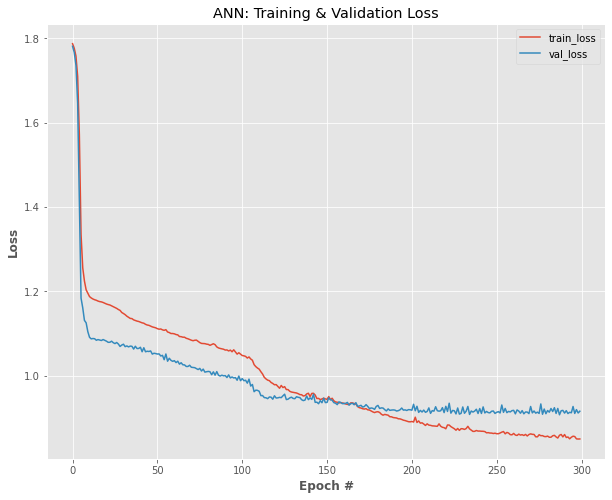

In [134]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, history_2.history["loss"], label="train_loss")
plt.plot(N, history_2.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

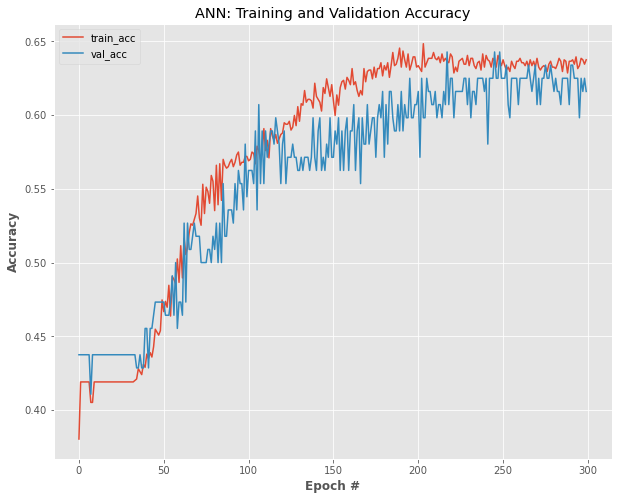

In [135]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, history_2.history["accuracy"], label="train_acc")
plt.plot(N, history_2.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()